In [60]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector

In [61]:
def R_matrix(frequencies,operator_list, rho):    # Note: R is a function of rho  :--- R(rho)
    R=np.zeros([2,2])
    for f,op in zip(frequencies,operator_list):
        predicted_prob=np.abs(np.trace(np.matmul(rho,operator_list)))
        R=R+f*op/predicted_prob
    return R

def get_operator_list(measurement_list):
    op_list=[]
    for state in measurement_list:
        operator=np.outer(state,state)
        operator=operator/(len(measurement_list)/2)
        op_list.append(operator)
        
    return op_list

def log_likelihood(frequencies,operator_list,rho):
    likelihood=0
    for f,op in zip(frequencies,operator_list):
        predicted_prob=np.abs(np.trace(np.matmul(rho,op)))
       
        likelihood=likelihood-f*np.log(np.abs(predicted_prob))
    return likelihood


In [62]:
#Give frequencies as lift with a fixed convention
frequencies=[0.25,0.25,0.5,0.0]      ## this state corresponds to +x

x0=[1/np.sqrt(2),1/np.sqrt(2)]
x1=[1/np.sqrt(2),-1/np.sqrt(2)]
z0=[1,0]
z1=[0,1]
measurement_list=[z0,z1,x0,x1]
operator_list=get_operator_list(measurement_list)

rho=np.array([[1,0],[0,1]])

R=R_matrix(frequencies,operator_list,rho)

print(R)

[[0.5  0.25]
 [0.25 0.5 ]]


[[0.5 0.5]
 [0.5 0.5]]


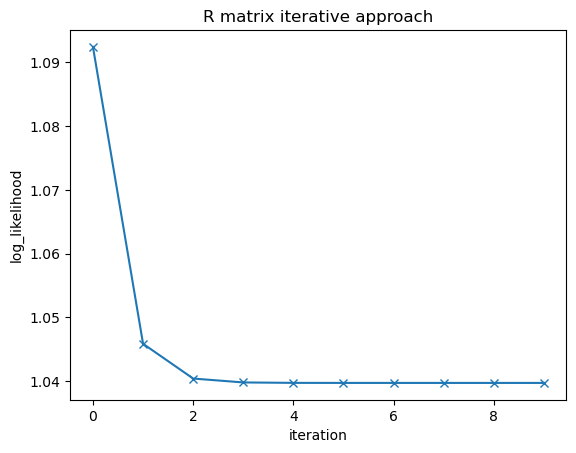

In [63]:
def MLE_iteration(frequencies,operator_list,iterations=10):
    rho=0.5*np.array([[1,0],[0,1]])
    likelihoods=[]
    
    for step in range(iterations):
        R=R_matrix(frequencies,operator_list,rho)
        
        new_rho=np.matmul(np.matmul(R,rho),R)
        normalized_new_rho= new_rho/np.trace(new_rho)
        rho=normalized_new_rho
        
        likelihoods.append(log_likelihood(frequencies,operator_list,rho))
    
    plt.title('R matrix iterative approach')
    plt.plot(likelihoods,marker='x')
    plt.ylabel('log_likelihood')
    plt.xlabel('iteration')

    return rho


final_rho=MLE_iteration(frequencies,operator_list)
print(final_rho)